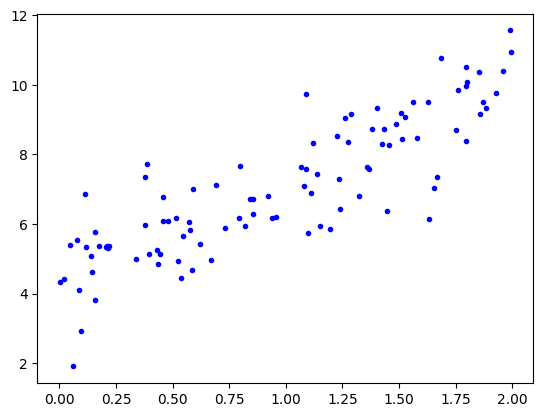

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.18683913],
       [2.89948311]])

### NOW we can make predictions using theta_hat

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.18683913],
       [9.98580536]])

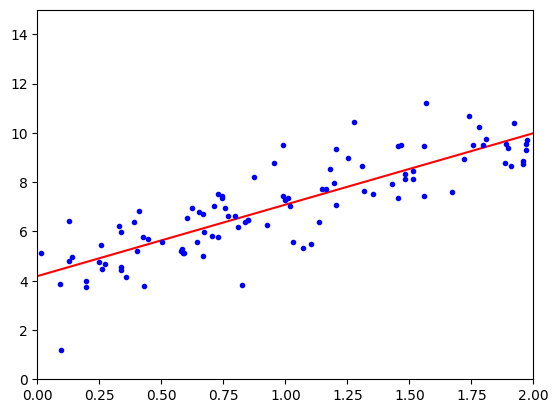

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Using sklearn

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)


array([[4.23795468],
       [9.80963803]])

In [44]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.23795468],
       [2.78584168]])

In [46]:
np.linalg.pinv(X_b).dot(y)

array([[4.23795468],
       [2.78584168]])

## Simple Gradient Descent

In [54]:
eta = 0.1               # learning rate
n_iterations = 1000
m = 100                 # number of training instances

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta))
    theta = theta - eta * gradients


In [55]:
theta

array([[ 1.63270722e-16],
       [-1.41788858e-16]])

## Stochastic Gradient Descent

In [52]:
n_epochs = 50
t0, t1 = 5, 50          # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi =   y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [53]:
theta

array([[4.24214112],
       [2.77987186]])

### Using Sklearn Stochastic Gradient Descent (SGD)

In [56]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [57]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11756473]), array([2.71169199]))

### Polynomial Regrassion


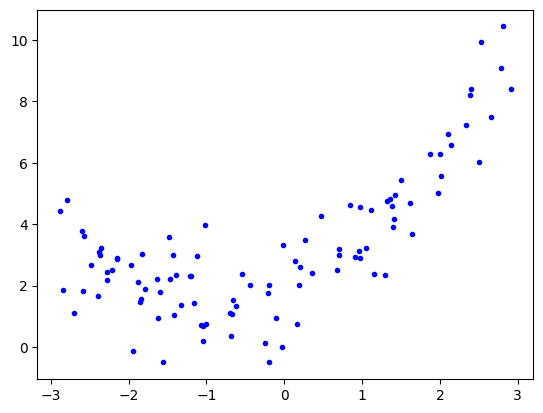

In [58]:
m = 100             # number of training instances
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.show()

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([1.12431218, 1.26407787])

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92552356]), array([[0.97032613, 0.54703982]]))

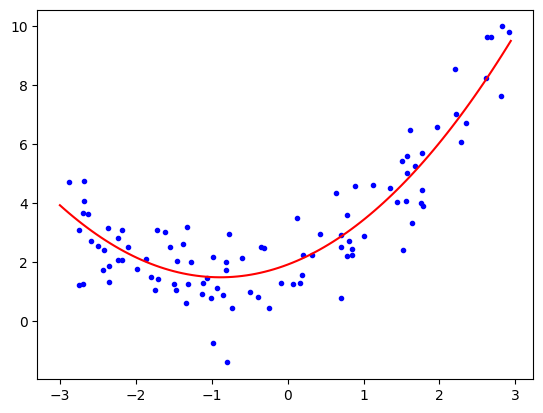

In [89]:
m = 100             # number of training instances
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
x = np.arange(-3, 3, 0.06)

Y = lin_reg.coef_[0][1] * x**2 + lin_reg.coef_[0][0]*x + lin_reg.intercept_[0]

plt.plot(X, y, "b.")
plt.plot(x, Y, "r-")
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],
        y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "val")
    plt.legend(loc='best')


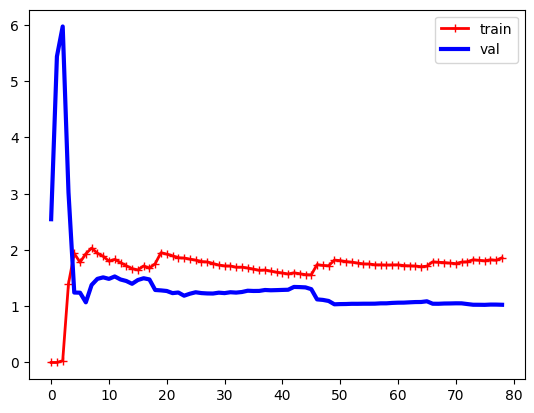

In [101]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### 10th-degree Polynomial

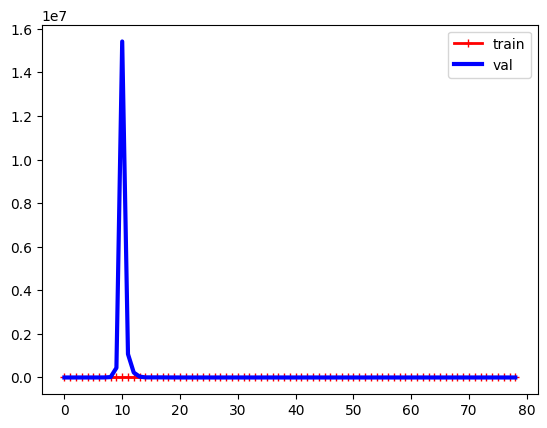

In [105]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, 
    include_bias=False)),
    ("lin_reg", LinearRegression()),

])

plot_learning_curves(polynomial_regression, X, y)

## Ridge Regression

In [106]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[4.71625501]])

## Stochastic Gradient Descent

In [107]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.70780948])

### Lasso Cost Function

In [108]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.65910153])

## Elastic Net


In [109]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.6638342])

### Early stopping

In [ ]:
from sklearn.base import clone

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", 
                       eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression

### Virginica Petal & Sepal

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [115]:
X = iris["data"][:, 3:]   # petal width
y = (iris["target"] == 2).astype(np.int_)  # 1 if Iris virginica, else 0

In [116]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

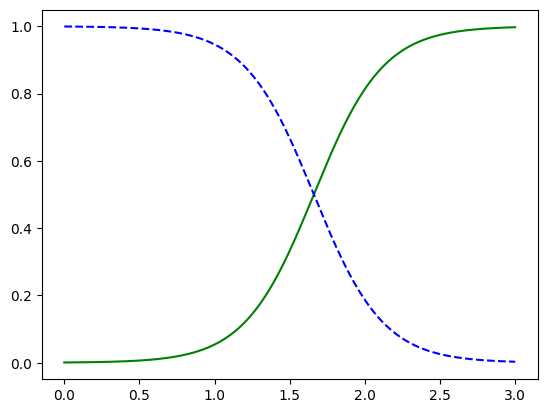

In [117]:
# Let’s look at the model’s estimated probabilities for 
# flowers with petal widths varying from 0 cm to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")

In [119]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### SoftMax score

In [121]:
# Sk (x) = xT . thetak


In [122]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [123]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                 C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [124]:
softmax_reg.predict([[5, 2]])

array([2])

In [125]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

### 01

In [133]:
# Which Linear Regression training algorithm can you use if you 
# have a training set with millions of features?

# If you have a training set with millions of features you can use 
# Stochastic Gradient Descent or Mini-batch Gradient Descent, and
# perhaps Batch gradient descent if the training set fits in 
# memory. But you cannot use the normal Equation or the SVD approach
# because the computational complexity grows quickly (more than N**2)
# with the number of features

### 02

In [137]:
# Suppose the features in your training set have very different scales. 
# Which algorithms might suffer from this, and how? What can you do 
# about it?

# If the features in ypur training set have very different scales, the 
# cost function will have the shape of an elongated bowl, so the 
# Gradient Descent algorithms will take a long time to converge.
# To solve this you should scale the data before training the model.
# Note that the Normal Equation or SVD approach will work just fine
# without scaling. MoreOver, regularized models may converge to a 
# suboptimal solution if the features are not scaled: since 
# regularization penalizes large weights, features with smaller values
# will tend to be ignored compared to features with larger values

### 03

In [131]:
# Can Gradient Descent get stuck in a local minimum when training 
# a Logistic Regression model?

# Gradient Descent cannot get stuck in a local minimum when training
# a logistic regression model because the cost function is convex.
# Convex means that if you draw a straight line between any two
# points on the curve, the line never crosses the curve


### 04 

In [130]:
# Do all Gradient Descent algorithms lead to the same model, 
# provided you let them run long enough?

# If the optimization problem is Convex, and assuming the learn rate
# is not too high, then all Gradient Descent algorithms will approach
# the global optimum and end up producing fairly similar models. 
# However, unless you gradually reduce the learning rate, Stochastic
# GD and Mini-batch GD will never truly converge; instead, they will
# keep jumping back and forth around the global optimum. This means
# that even if you let them run for a very long time, these Gradient
# Descent algorithms will produce slightly different models.

### 05

In [129]:
# Suppose you use Batch Gradient Descent and you plot the validation
# error at every epoch. If you notice that the validation error 
# consistently goes up, what is likely going on? How can you fix this?

# If the validation error consistently goes up after every epoch, then
# one possibility is that the learning rate is too high and the algorithm
# is diverging. If the training error also goes up, then this is clearly
# the problem and you should reduce the learning rate. However, if the
# training error is not going up, then your model is overfitting the 
# training set and you should stop training

### 06

In [128]:
# Is it a good idea to stop Mini-batch Gradient Descent immediately 
# when the validation error goes up?

# Due to their random nature, neither SGD nor Mini-batch GD is guaranteed
# to make progress at every single training iteration. So if you 
# immediately stop training when the validation error goes up, you may
# stop much too early, before the optimum is reached. A better option
# is to save the model at regular intervals; then, when it has not 
# improved for a long time (meaning it will probably never beat the 
# record), you can revert to the best saved model.

### 07

In [127]:
# Which Gradient Descent algorithm (among those we discussed) will reach 
# the vicinity of the optimal solution the fastest? Which will actually 
# converge? How can you make the others converge as well?

# Stochastic Gradient Descent has the fastest training iteration since it
# considers only one training instance at a time, so it is generally the 
# first to reach the vicinity of the global optimum. However, only Batch
# GD will actually converge, given enough training time. As mentioned,
# Stochastic GD and Mini-Batch GD will bounce around the optimum, unless
# you gradually reduce the learning rate



### 08

In [126]:
# Suppose you are using Polynomial Regression. You plot the learning
# curves and you notice that there is a large gap between the training
# error and the validation error. What is happening? What are three
# ways to solve this?

# If the validation error is much higher than the training error, this
# is likely because your model is overfitting the training set. One
# way to try to fix this is to reduce the polynomial degree: a model
# with fewer degrees of freedom is less likely to overfit. Another
# thing you can try is to regularize the model - for example, by 
# adding an l2 penalty (Ridge) or an l1 penalty (Lasso) to the cost
# function. This will also reduce the degrees of freedom of the model.
# Lastly, you can try to increase the size of the training set.

### 09

In [ ]:
# Suppose you are using Ridge Regression and you notice that the
# training error and the validation error are almost equal and fairly
# high. Would you say that the model suffers from high bias or high
# variance? Should you increase the regularization hyperparameter α
# or reduce it?

# If both the training error and the validation error are almost equal
# and fairly high, the model is likely underfitting the training set,
# which means it has a high bias. You should try reducing the 
# regularization hyperparameter α (alpha).

### 10

In [ ]:
# Why would you want to use:
# a. Ridge Regression instead of plain Linear Regression 
# (i.e., without any regularization)?
# b. Lasso instead of Ridge Regression?
# c. Elastic Net instead of Lasso?

# A model with some regularization typically performs better then a 
# model without any regularization, so you should generally prefer 
# Ridge Regression over plain Linear Regression.

# Lasso Regression uses an l1 penalty, which tends to push the weights
# down to exactly zero. This leads to sparse models, where all weights
# are zero except fot the most important weights. This is a way to 
# perform feature selection automatically, which is good if you suspect
# that only a few features actually matter. When you are not sure, you
# should prefer Ridge Regression

# Elastic Net is generally preferred over Lasso since Lasso behave
# erratically in some cases (when several features are strongly 
# correlated or when there are more features than training instances.)
# However, it does add an extra hyperparameter to tune. If you want
# Lasso without the erratic behavior, you can just use Elastic Net with
# an l1_ratio close to 1.

### 11

In [ ]:
# Suppose you want to classify pictures as outdoor/indoor and
# daytime/nighttime. Should you implement two Logistic Regression
# classifiers or one Softmax Regression classifier?

# If you want to classify pictures as outdoor/indoor and daytime/nighttime,
# since these are not exclusive classes (all combinations are possible) you
# should train two Logistic Regression Classifiers.

### 12

In [6]:
# Implement Batch Gradient Descent with early stopping for Softmax
# Regression (without using Scikit-Learn).



In [7]:
# Load the data

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [8]:
# We need to add the bias term for every instance (x_0 = 1):

X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [9]:
# Let's set the random seed so the output is reproducible

np.random.seed(2042)

In [10]:
# Splitting dataset into test and validation

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [11]:
# The targets are currently class indices (0, 1 or 2), but we need 
# target class probabilities to train the Softmax Regression model. 
# Each instance will have target class probabilities equal to 0.0 
# for all classes except for the target class which will have a 
# probability of 1.0 (in other words, the vector of class probabilities
# for ay given instance is a one-hot vector). Let's write a small 
# function to convert the vector of class indices into a matrix 
# containing a one-hot vector for each instance:

In [12]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [13]:
# test with 10 instances
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [14]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
# Target class probabilities matrix for training and test set

Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

![title](softmax.png)

In [16]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [17]:
n_inputs = X_train.shape[1] 
n_outputs = len(np.unique(y_train))

![title](gradients.png)

In [18]:
# Note that p_k may not be computable if p_k = 0. So we will add
# a tiny value epsilon to log(p_k) to avoid getting nan values

eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [19]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [20]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [22]:
# Well, this model looks pretty good. For the sake of the exercise, 
# let's add a bit of l2 regularization. The following training code 
# is similar to the one above, but the loss now has an additional 
# l2 penalty, and the gradients have the proper additional term 
# (note that we don't regularize the first element of Theta since 
# this corresponds to the bias term). Also, let's try increasing 
# the learning rate eta.

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1             # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * 
        np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [23]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [26]:
# Cool, perfect accuracy! We probably just got lucky with this 
# validation set, but still, it's pleasant. Now let's add early 
# stopping. For this we just need to measure the loss on the 
# validation set at every iteration and stop when the error starts
# growing.

eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.897275838876366
500 0.5702751662442892
1000 0.5425654873413586
1500 0.5353090385301479
2000 0.5331256731252507
2500 0.5325827330917428
2736 0.5325454243382794
2737 0.5325454252101579 early stopping!


In [27]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

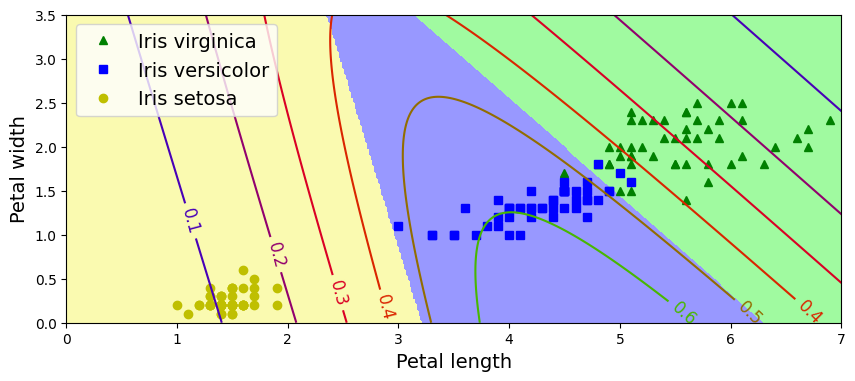

In [30]:
# Still perfect, but faster.
# Now let's plot the model's predictions on the whole dataset:

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [31]:
# Let's measure the final model's accuracy on the test set:

logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

In [ ]:
# Our perfect model turns out to have slight imperfections. 
# This variability is likely due to the very small size of the dataset: 
# depending on how you sample the training set, validation set and 
# the test set, you can get quite different results. Try changing the
# random seed and running the code again a few times, you will see that 
# the results will vary.